In [2]:
import torch

x = torch.arange(9)
print(x)
print(x.shape)
print(type(x))

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])
torch.Size([9])
<class 'torch.Tensor'>


In [3]:
# Numpy 형태로 변환
print(x.numpy())
print(x.type)

[0 1 2 3 4 5 6 7 8]
<built-in method type of Tensor object at 0x7fc267f77320>


In [4]:
x.reshape(3, 3)
print(x)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])


In [5]:
x = torch.arange(9).reshape(3, 3)
print(x)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [6]:
x + x

tensor([[ 0,  2,  4],
        [ 6,  8, 10],
        [12, 14, 16]])

### 텐서의 생성과 변환
- Tensor는 pytorch의 가장 기본이 되는 데이터 구조

- Numpy의 ndarray와 비슷하고 GPU 사용하는 계산 가능

- 일반적으로 Tensor는 FloatTensor라고 생각하면 되고, `torch.tensor` 함수로 작성할 수 있음

In [7]:
import numpy as np

torch.tensor([[1, 2], [3, 4]])

tensor([[1, 2],
        [3, 4]])

In [8]:
# GPU에 텐서를 만들 수도 있음

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

torch.tensor([[1, 2], [3, 4]], device=device)

tensor([[1, 2],
        [3, 4]], device='cuda:0')

In [9]:
# dtype를 활용하여 특정 데이터 타입의 텐서를 만들 수도 있음

torch.tensor([[1, 2], [3, 4]], dtype=torch.float64)

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

In [10]:

# tensor 빠르게 생성하기

torch.arange(0, 10) # 0부터 10까지 (10 - 0) / 1 Dimension의 tensor를 생성

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
torch.zeros(3, 5).to(device) # 모든 value가 0인 3 x 5 차원의 텐서를 생성

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], device='cuda:0')

In [12]:
torch.randn(3, 5) # normal distribution에서 추출된 value로 3 x 5 차원의 텐서를 생성

tensor([[ 1.9885, -1.2043,  0.7778, -0.3797,  0.5332],
        [ 0.5288,  0.8349,  0.0089, -1.2293,  0.2241],
        [-0.1507, -0.6710,  1.5181, -0.2936, -0.2198]])

In [13]:
# tensor의 shape은 size 메서드로 확인 가능 

t = torch.randn(3, 5)
t.shape

torch.Size([3, 5])

In [14]:
t.size()

torch.Size([3, 5])

- Tensor는 `numpy.ndarray`로 쉽게 변화 가능

- 하지만 GPU 상의 텐서를 변환할 때는 CPU로 먼저 옮겨야 변환 가능

In [15]:
t = torch.tensor([[1, 2], [3, 4]])
x = t.numpy()
x

array([[1, 2],
       [3, 4]])

In [16]:
# GPU 상의 텐서 -> ndarray

t = torch.tensor([[1, 2], [3, 4]], device=device)
x = t.to('cpu').numpy()
x

array([[1, 2],
       [3, 4]])

- `torch.linspace` : `numpy.linspace`와 같은 함수임

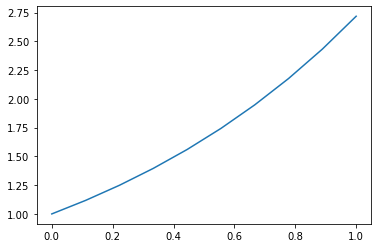

In [20]:
import matplotlib.pyplot as plt

x = torch.linspace(0, 1, 10)
y = torch.exp(x)

plt.plot(x.numpy(), y)
plt.show()

### 텐서의 index 조작
- `numpy.ndarray`와 동일하게 인덱스 지정, masking, slicing 모두 사용 가능

In [21]:
t = torch.tensor([
    [1, 2, 3], [4, 5, 6]
])

print(t)

# Indexing
t[0, 2]

tensor([[1, 2, 3],
        [4, 5, 6]])


tensor(3)

In [22]:
# Slicing
t[:, :2]

tensor([[1, 2],
        [4, 5]])

In [23]:
# Masking / 해당 조건에 대해 True 값만 출력
t[t > 3]

tensor([4, 5, 6])

In [24]:
# Slicing을 통해 대입
t[:, 1] = 10
t

tensor([[ 1, 10,  3],
        [ 4, 10,  6]])

In [25]:
# Masking을 통해 대입
t[t > 5] = 0
t

tensor([[1, 0, 3],
        [4, 0, 0]])

### 텐서 연산
- GPU를 사용하면 연산 가속 가능

- 사칙연산 할 때, 같은 type의 텐서, 파이썬의 스칼라 사이에서 가능 (i.e. FloatTensor와 DoubleTensor 사이의 사칙연산은 오류 발생)

- 스칼라 연산 시에는 `broadcasting` 지원함

In [26]:
v = torch.tensor([1, 2, 3])
w = torch.tensor([0, 10, 20])

m = torch.tensor([
    [0, 1, 2], [50, 100, 150]
])

# Vector와 Scalar 덧셈 (broadcasting)
v1 = v + 10
v1

tensor([11, 12, 13])

In [27]:
v1 = v ** 2
v1

tensor([1, 4, 9])

In [28]:
# 동일한 길이의 vector 연산
z = w - v
z

tensor([-1,  8, 17])

In [29]:
u = 2 * v - w / 10 + 6.0
u

tensor([ 8.,  9., 10.])

In [30]:
# Matrix와 scalar 계산
m2 = m * 2.0
m2

tensor([[  0.,   2.,   4.],
        [100., 200., 300.]])

In [31]:
# matrix와 vector 계산 (broadcasting)
print(f'vector : {v.size()} | matrix : {m.size()}')
print(v)
print(m)
m + v

vector : torch.Size([3]) | matrix : torch.Size([2, 3])
tensor([1, 2, 3])
tensor([[  0,   1,   2],
        [ 50, 100, 150]])


tensor([[  1,   3,   5],
        [ 51, 102, 153]])

In [32]:
# matrix와 matrix
print(m)
print(m + m)

tensor([[  0,   1,   2],
        [ 50, 100, 150]])
tensor([[  0,   2,   4],
        [100, 200, 300]])


### 텐서의 차원 조작
- `view`, `stack`, `cat` : 텐서 차원 변경 및 텐서 결합

- `t`, `transpose` : 텐서 차원 교환

- `view` = `reshape` 둘이 같은 것

In [33]:
a = torch.tensor([
    [1, 2], [3, 4]
])

b = torch.tensor([
    [10, 20, 30], [40, 50, 60]
])

print(a.size(), b.size())

torch.Size([2, 2]) torch.Size([2, 3])


In [34]:
# 2 x 2 tensor를 4 x 1로 변경
a.view(4, 1)

tensor([[1],
        [2],
        [3],
        [4]])

In [35]:
# 2 x 2 tensor를 1 x 4로 변경
a.reshape(1, 4)

tensor([[1, 2, 3, 4]])

In [36]:
# -1로 지정하면 알아서 dimension 맞춰줌
a.view(-1) # 1차원으로

tensor([1, 2, 3, 4])

In [37]:
a.view(1, -1) # 1 x 4 로 변경

tensor([[1, 2, 3, 4]])

In [39]:
a.view(-1, 1) # 4 x 1로 변경

tensor([[1],
        [2],
        [3],
        [4]])

In [40]:
# .t() 하면 전치 행렬
print(b)
print(b.t())

tensor([[10, 20, 30],
        [40, 50, 60]])
tensor([[10, 40],
        [20, 50],
        [30, 60]])


In [41]:
# .cat을 통해 두 개의 tensor를 묶어줄 수 있음
print(a.size(), b.size())

torch.cat([a, b], dim=1) # 2 x 2과 2 x 3을 dimension 1에서 합쳐주므로 2 x 5 생성 

torch.Size([2, 2]) torch.Size([2, 3])


tensor([[ 1,  2, 10, 20, 30],
        [ 3,  4, 40, 50, 60]])

In [43]:
# .transpose를 통해 첫번째 인자의 dimension과 두번째 인자의 dimension의 value를 교환
CHWB_image_batch = torch.rand(3, 224, 224, 64)
BHWC_image_batch = CHWB_image_batch.transpose(0, 3)

print(CHWB_image_batch.size(), BHWC_image_batch.size())

torch.Size([3, 224, 224, 64]) torch.Size([64, 224, 224, 3])
